In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [22]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


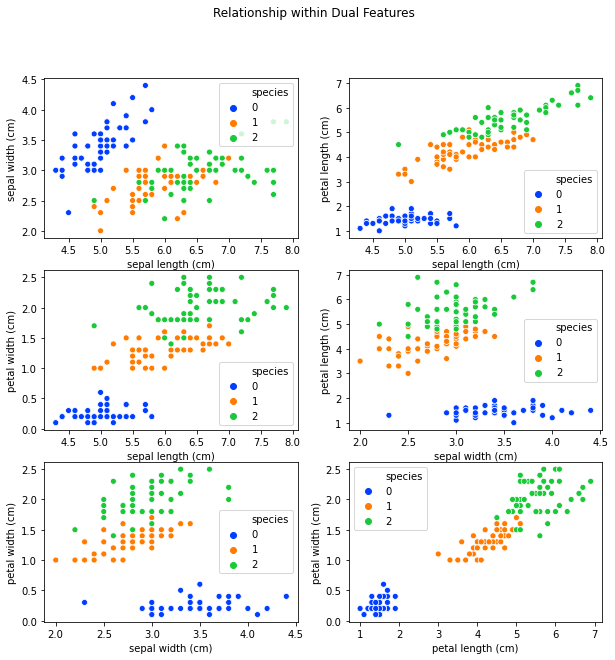

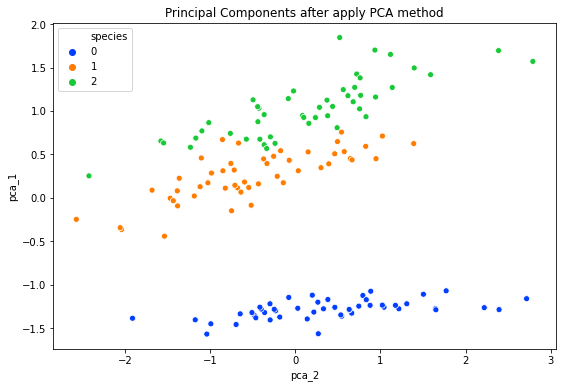

In [9]:
#visualize relationship with dual feature 
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
ax = ax.flatten()
counter = 0
for x in [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]:
    sns.scatterplot(data=iris_df, x=iris_df.iloc[:, x[0]], y=iris_df.iloc[:, x[1]], ax=ax[counter], hue="species", palette="bright")
    counter += 1    
plt.suptitle("Relationship within Dual Features")
plt.show()

#Principal Component Analysis
f, ax = plt.subplots(figsize=(9, 6))
pca = PCA(n_components=2, whiten=True)
pca.fit(iris.data)
X_reduced = pca.transform(iris.data)
iris_df["pca_1"] =X_reduced[:, 0]
iris_df["pca_2"] = X_reduced[:, 1]
sns.scatterplot(data=iris_df, x="pca_2", y="pca_1", hue="species", palette="bright")
plt.title("Principal Components after apply PCA method")
plt.show()

## k-fold Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#select train data and apply cross validation to it
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
for x in cv_scores:#model is logical to predict
    print("{:.2f}".format(x)) 
print("Mean score : {:.2f}".format(cv_scores.mean()))


1.00
1.00
0.92
1.00
1.00
0.92
1.00
1.00
1.00
1.00
Mean score : 0.98


In [12]:
knn.fit(X_train, y_train)
print("Accuracy : {}".format(knn.score(X_test, y_test)))

Accuracy : 0.9333333333333333


## Grid Search Cross Validation

In [33]:
#make iris data for binary classification
X = iris.data[:100]
y = iris.target[:100] 

#define params
params = {
    "C" : np.logspace(-3, 3, 7),
    "penalty" : ["l1", "l2"]
}

#split train and test data
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

#apply grid search to hyperparameter to get best params
log_reg = LogisticRegression()
log_reg_gscv = GridSearchCV(log_reg, params, cv=10, n_jobs=-1)
log_reg_gscv.fit(X_tr, y_tr)
log_reg_gscv.best_params_


{'C': 0.001, 'penalty': 'l2'}

In [38]:
log_reg_tuned = LogisticRegression(C=0.001, penalty="l2")
log_reg_tuned.fit(X_tr, y_tr)
print("accuracy : {}".format(log_reg_tuned.score(X_te, y_te)))

accuracy : 1.0


In [50]:
df_0 = pd.DataFrame({"id" : [0, 1, 2, 4, 52], "feature_1" : ["asa", "sdasda", "sda", "qwq", "a"]})
df_1 = pd.DataFrame({"id" : [4, 2, 1, 52, 45, 1], "feature_2" : [122, 121, 131, 13121, 13313, 111]})
df_merged = pd.merge(df_0, df_1, how="outer")
df_merged

,id,feature_1,feature_2
0,0,asa,NaN
1,1,sdasda,131.0
2,1,sdasda,111.0
3,2,sda,121.0
4,4,qwq,122.0
5,52,a,13121.0
6,45,NaN,13313.0
